# 3.Tìm kiếm nguồn dataset khác và train thử với yolo v8s

## Bài làm sử dụng dataset hard-hat-sample

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.7/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="SYVn4ItV6YVxglLFFAiN")
project = rf.workspace("trquan").project("hard-hat-sample-ancej")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Hard-Hat-Sample-2 in yolov8:: 100%|██████████| 491/491 [00:00<00:00, 1448.19it/s]


##  Training

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640

/content
100% 21.5M/21.5M [00:00<00:00, 410MB/s]
New https://pypi.org/project/ultralytics/8.2.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Hard-Hat-Sample-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, strea

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    labels.jpg	  train_batch0.jpg
confusion_matrix_normalized.png			    P_curve.png   train_batch1.jpg
confusion_matrix.png				    PR_curve.png  train_batch2.jpg
events.out.tfevents.1722442025.6439c4d1f445.1033.0  R_curve.png   val_batch0_labels.jpg
F1_curve.png					    results.csv   val_batch0_pred.jpg
labels_correlogram.jpg				    results.png   weights


/content


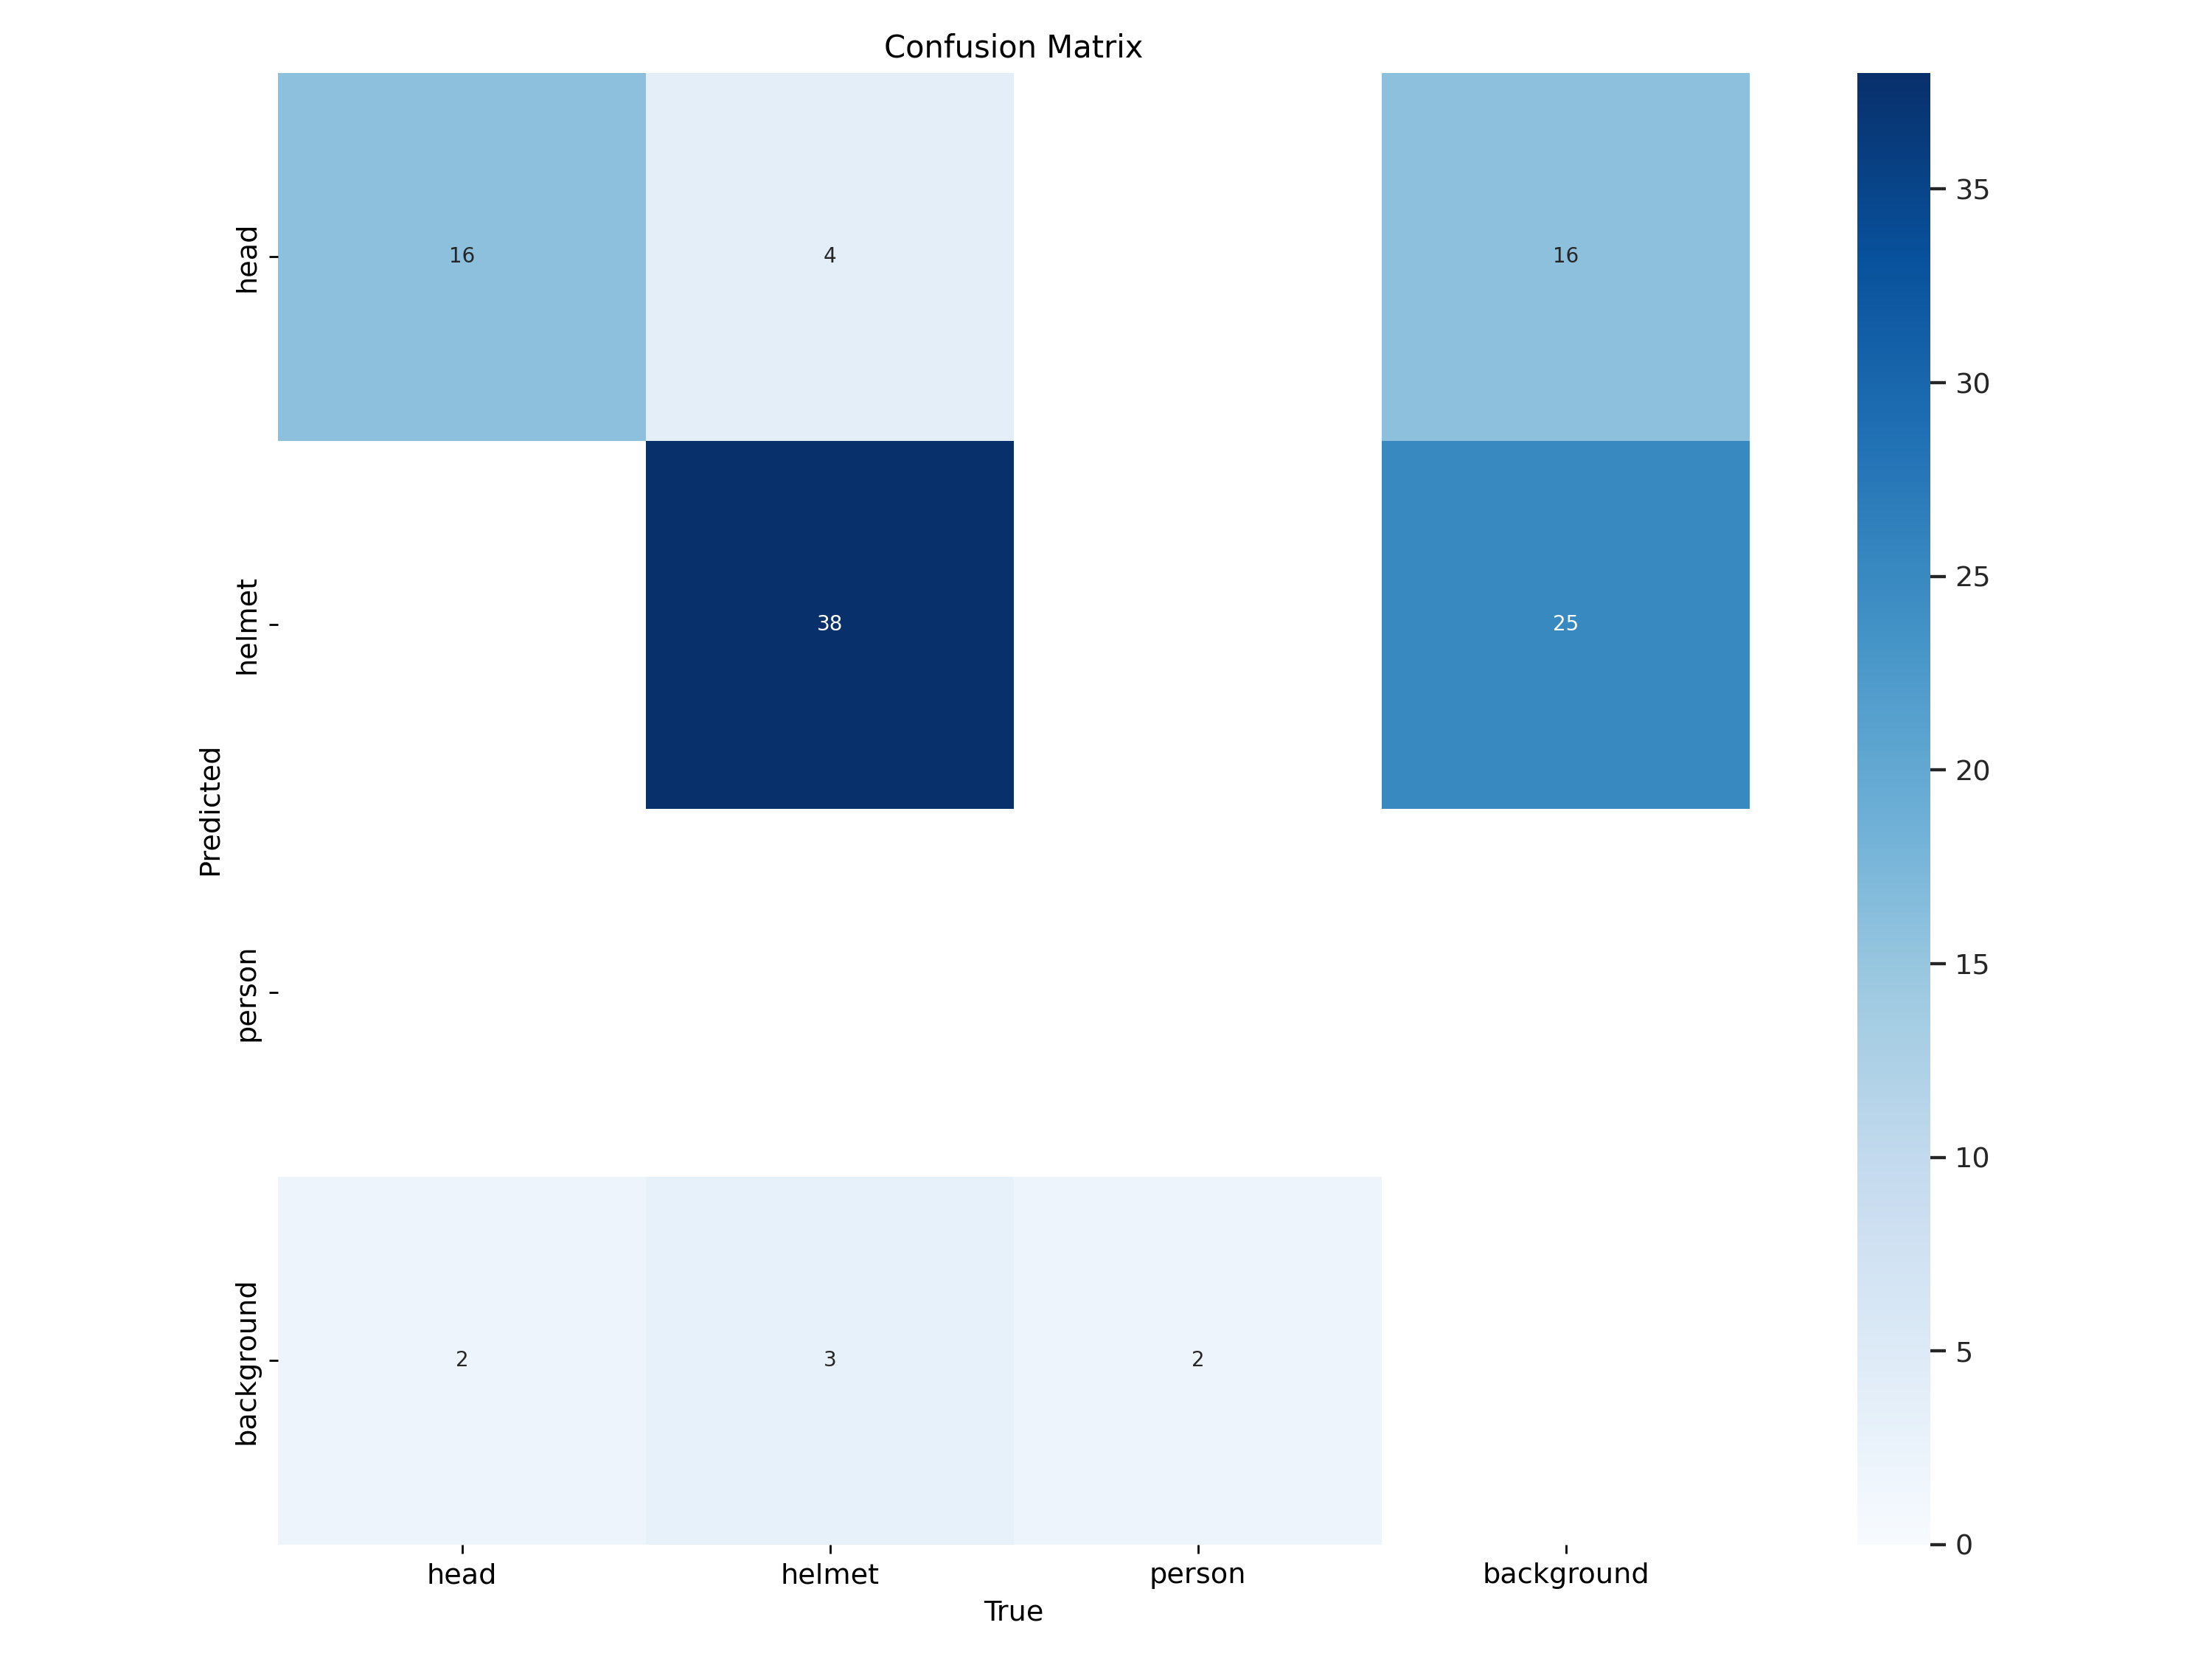

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


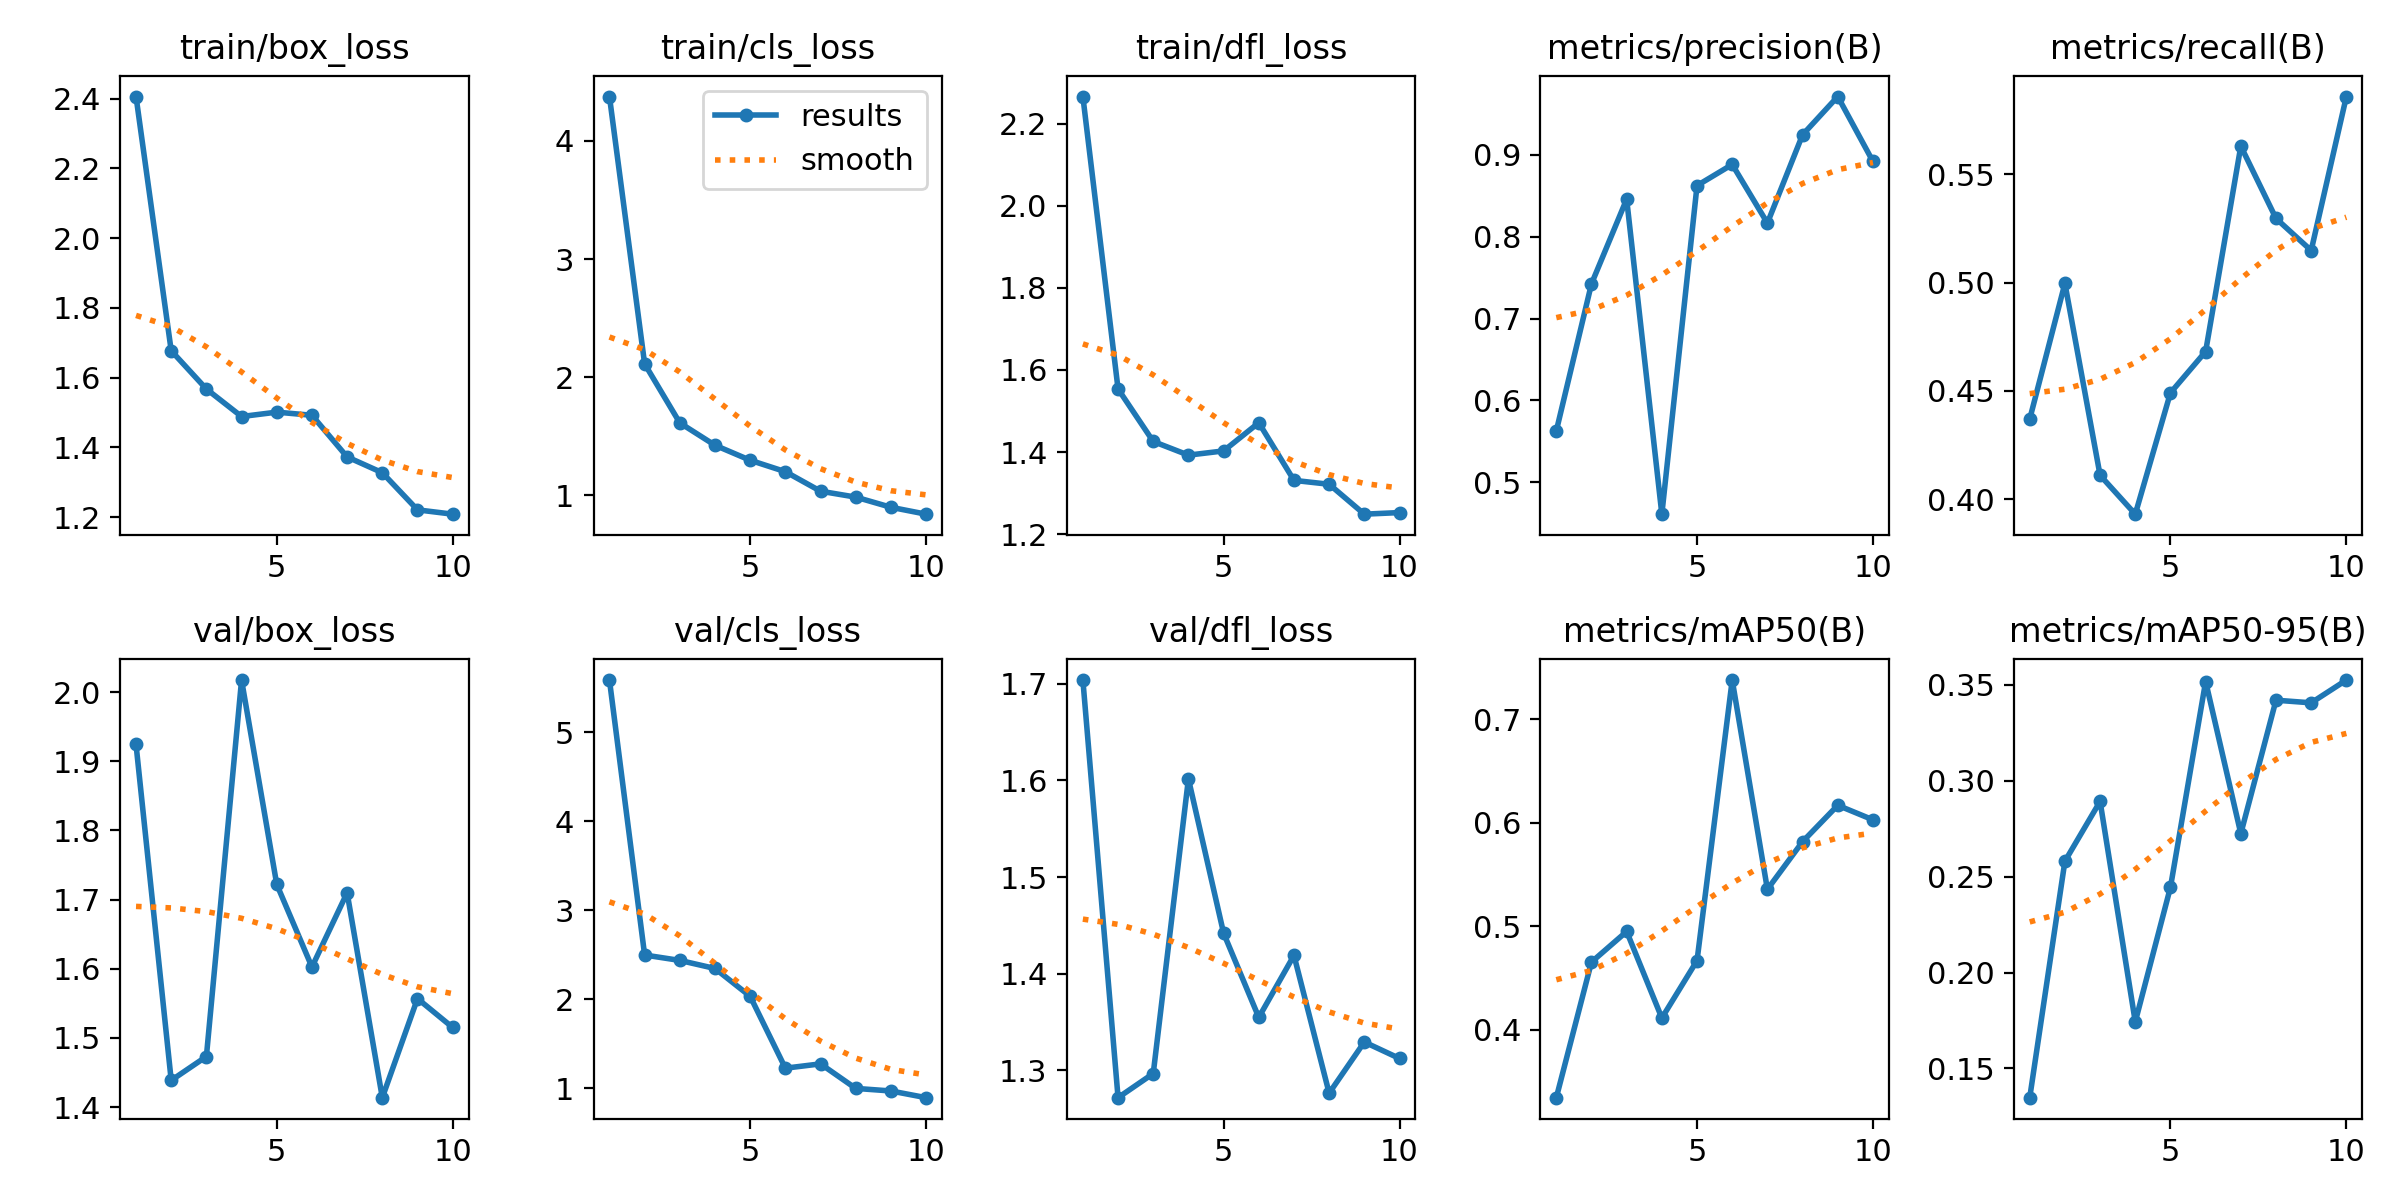

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


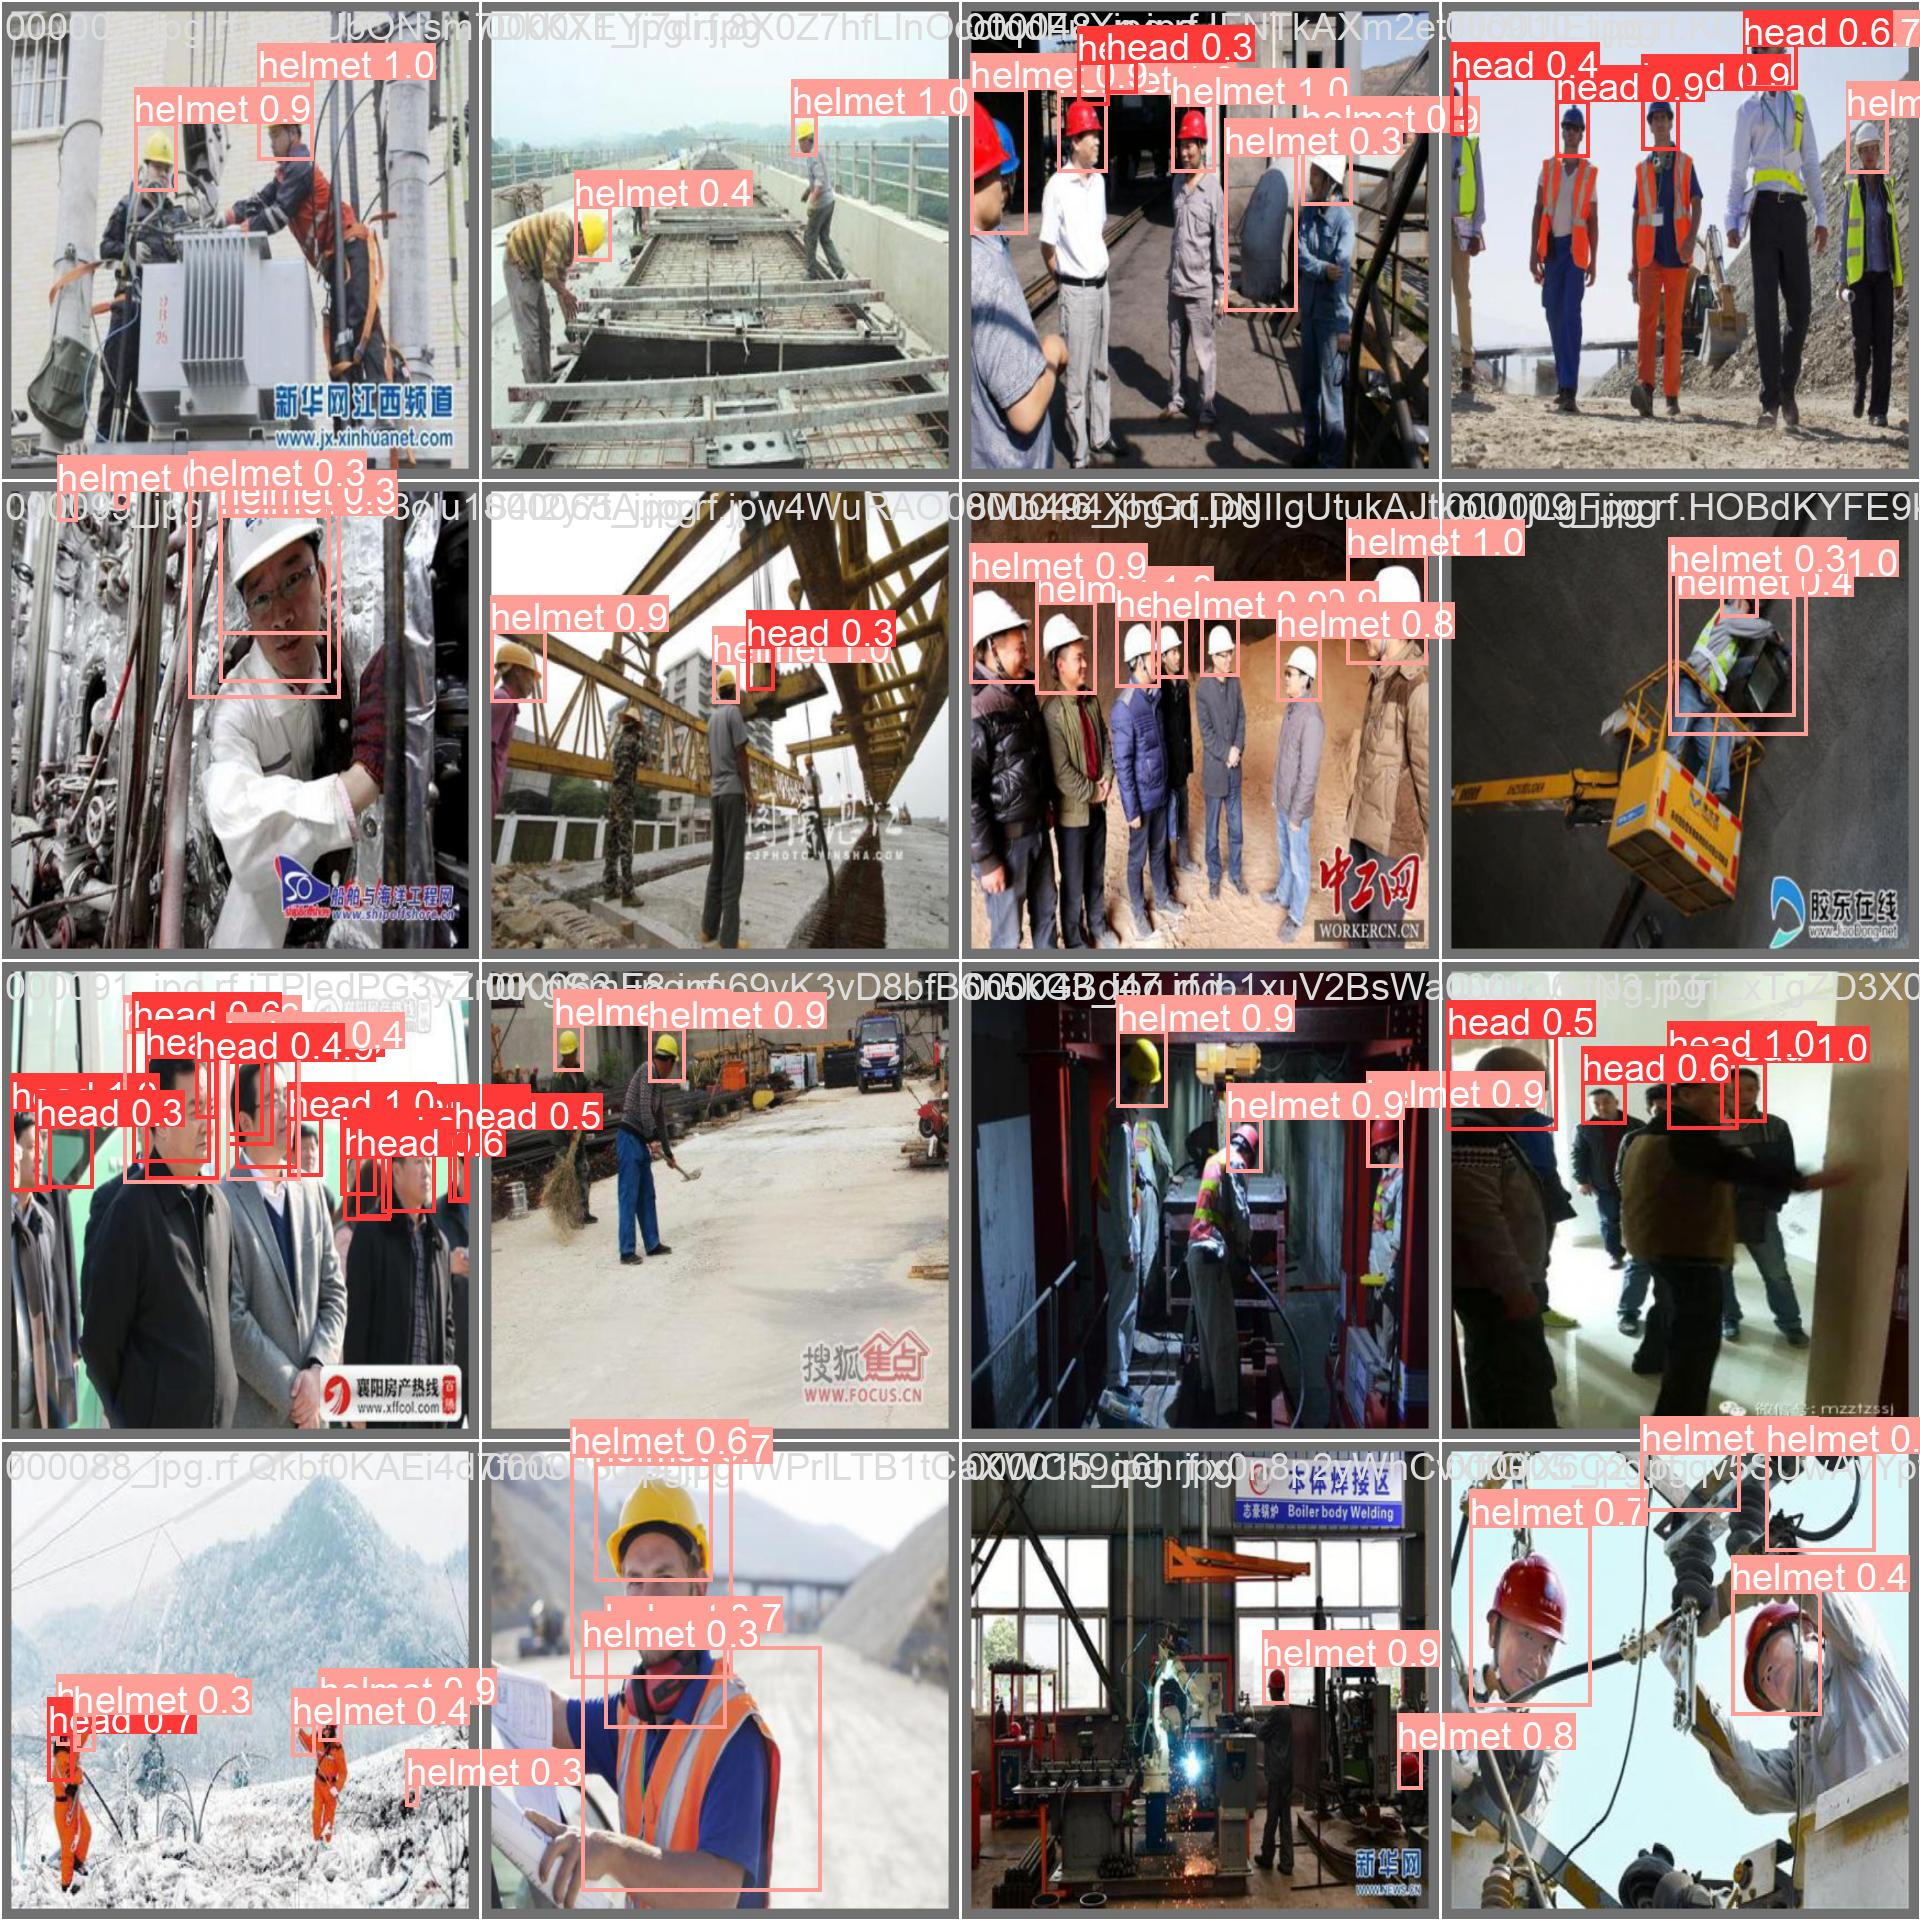

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Hard-Hat-Sample-2/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100% 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.01s/it]
                   all         20         65      0.888      0.468      0.738      0.349
                  head         20         18      0.665      0.722      0.816      0.499
                helmet         20         45          1      0.682      0.887      0.444
                person         20          2          1          0       0.51      0.104
Speed: 0.2ms preprocess, 25.2ms inference, 0.0ms loss, 29.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


**Kết luận**: Dựa vào bảng trên thì phần detect tốt nhất có thể là "head" và "helmet" do có Recall khá cao, trên 0.6. Trong khi đó, "person" có Recall bằng 0, nghĩa là mô hình không phát hiện được bất kỳ đối tượng nào thuộc 2 class này trong tập dữ liệu.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true save_crop=true

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/10 /content/datasets/Hard-Hat-Sample-2/test/images/000008_jpg.rf.tiUVL3AK8lGPKfALCp2G.jpg: 640x640 1 head, 7 helmets, 16.3ms
image 2/10 /content/datasets/Hard-Hat-Sample-2/test/images/000011_jpg.rf.wUFWktFJxS5YdVZORXKT.jpg: 640x640 3 heads, 19 helmets, 16.4ms
image 3/10 /content/datasets/Hard-Hat-Sample-2/test/images/000034_jpg.rf.Wt9parVyjrBNTLpcstKe.jpg: 640x640 1 head, 16.3ms
image 4/10 /content/datasets/Hard-Hat-Sample-2/test/images/000047_jpg.rf.sEVOjyEKP1bn4eppOqJg.jpg: 640x640 6 helmets, 16.3ms
image 5/10 /content/datasets/Hard-Hat-Sample-2/test/images/000054_jpg.rf.dh1wCF0KN5lxpapMR4dQ.jpg: 640x640 2 helmets, 16.3ms
image 6/10 /content/datasets/Hard-Hat-Sample-2/test/images/000073_jpg.rf.56gVHE99JaS6jfKzcue6.jpg: 640x640 12 helmets, 16.3ms
image 7/10 /content/datasets/Hard-Hat-Sample-2/test/ima

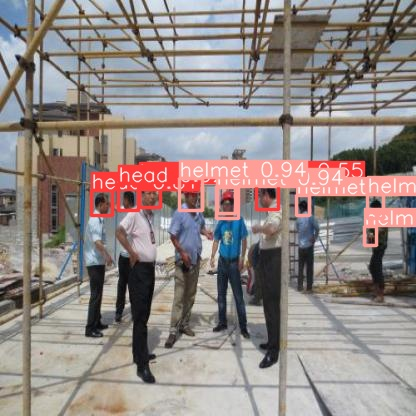

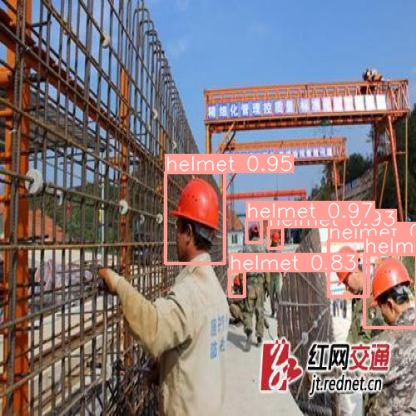

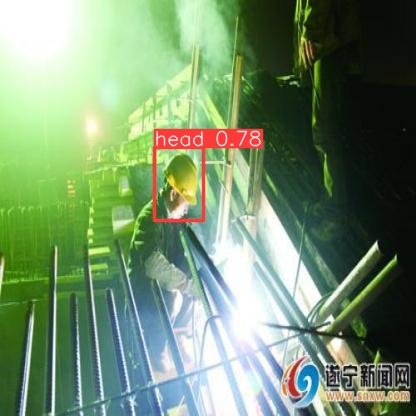

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

## 3.2. Hiển thị phần detect tốt nhất

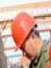

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/crops/helmet/*.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print("\n")

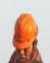

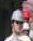

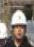

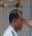

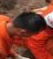

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/crops/head/*.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print("\n")

## 3.3. Hiển thị phần detect không tốt nhất

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/crops/person/*.jpg')[:5]:
      display(Image(filename=image_path, height=600))
      print("\n")